### Introduction :
**Dataset:** The Dataset contains the details of patients .
The original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient or not(1 or 0). 

**Problem statement:** The goal is to make a ML model to predict whether the paitent has heart disease or not.

**Attributes:** 

- Age
- sex	
- cp	
- trestbps	
- chol	
- fbs	
- restecg	
- thalach	
- exang	
- oldpeak	
- slope	
- ca	
- thal	
- target


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load the dataset using pandas
df = pd.read_csv("datasets_heart.csv")

In [3]:
#Look at first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Number of rows and columns in dataset
df.shape

(303, 14)

**Description : The dataset contains 303 rows and 14 columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Description : As we can see all the attributes are of numeric type**

In [12]:
#five points summary of each attribute
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Checking the presence of missing values:**

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Description : There is no missing value in the dataset.**

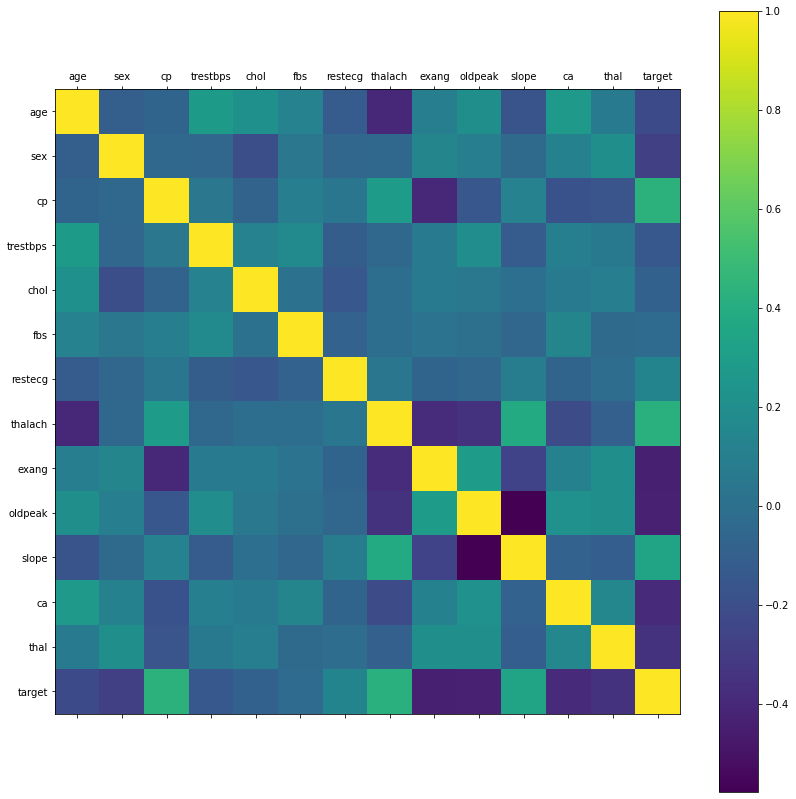

In [14]:
#Correlation matrix
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187070B5588>,
      dtype=object)

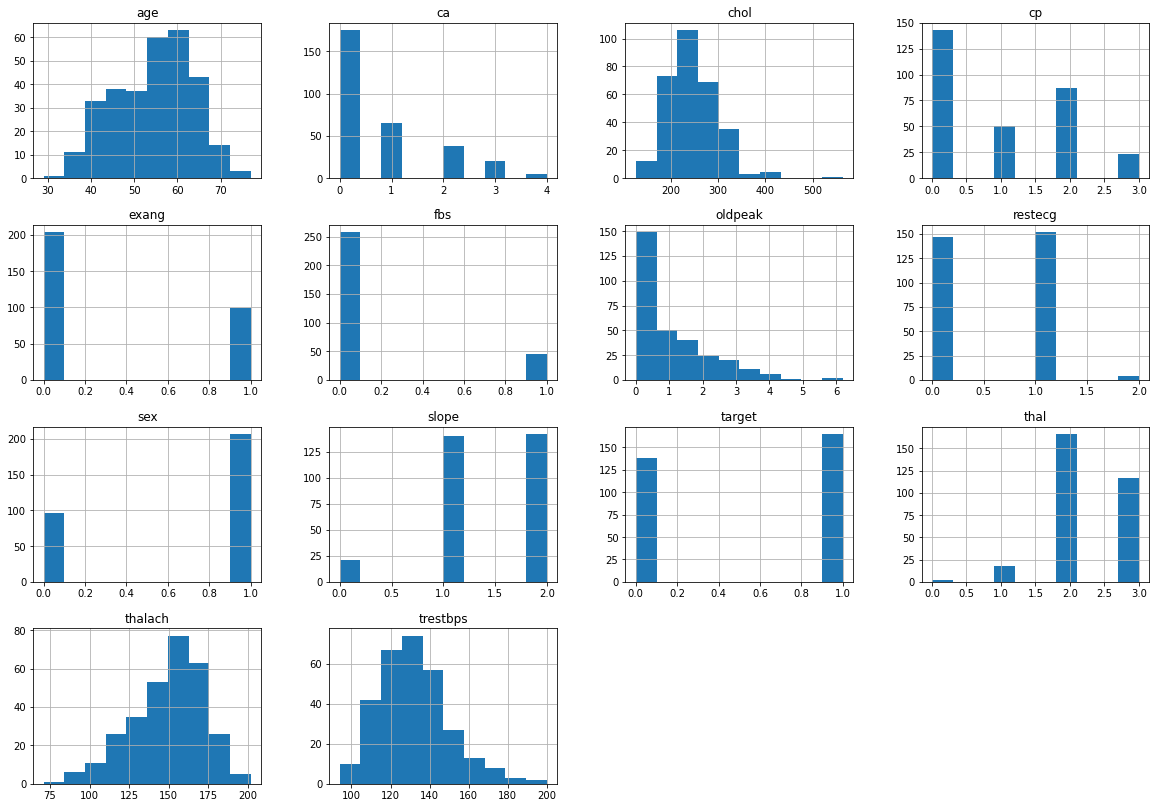

In [15]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

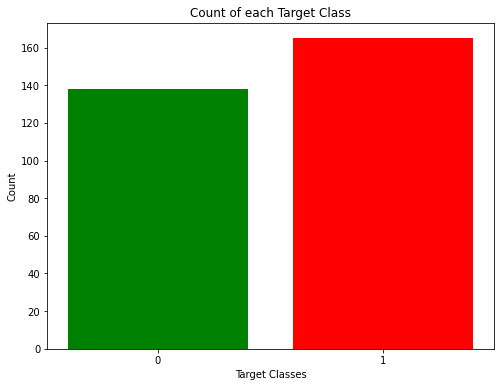

In [17]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [19]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## Data Preprocessing:
**To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.
Let’s say we have a column Gender, with values 1 for Male and 0 for Female. It needs to be converted into two columns with the value 1 where the column would be true and 0 where it will be false.**

In [20]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

**Next, we need to scale the dataset for which we will use the StandardScaler. The fit_transform() method of the scaler scales the data and we update the columns.**

In [26]:
sc = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = sc.fit_transform(df[columns_to_scale])


In [27]:
#Splitting the dataset using train_test_split
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

**K Neighbors Classifier:**

In [28]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

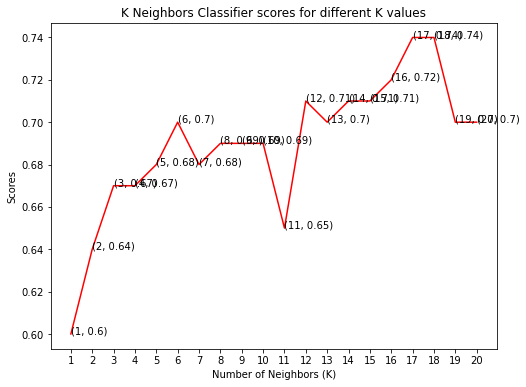

In [29]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

**As you can see, we achieved the maximum score of 74% when the number of neighbors was chosen to be 8.**

**Support Vector Classifier:**

In [30]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

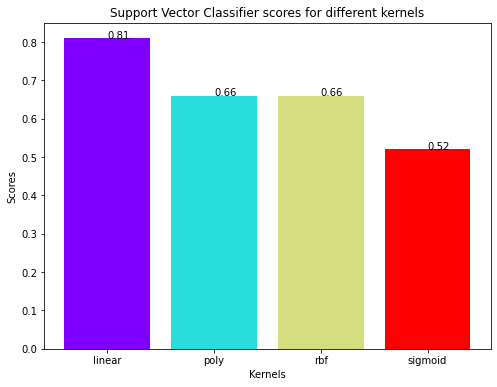

In [31]:
#Applying the rainbow method to select different colors for each bar and plot a bar graph of the scores achieved by each.
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

**As can be seen from the plot above, the linear kernel performed the best for this dataset and achieved a score of 81%**

**Decision Tree Classifier:**

In [33]:

dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

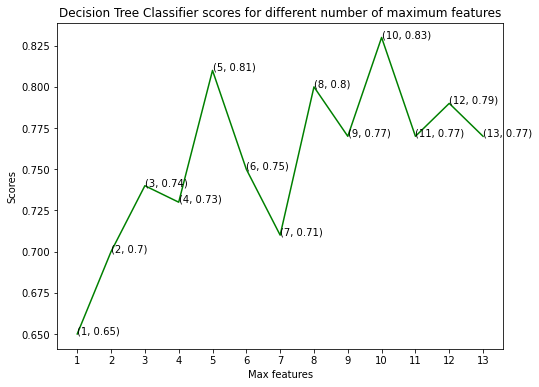

In [34]:
#we can now plot a line graph and see the effect of the number of features on the model scores.
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

**From the line graph above, we can clearly see that the maximum score is 83% and is achieved for maximum features being selected to be 10.**

**Random Forest Classifier:**

In [35]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

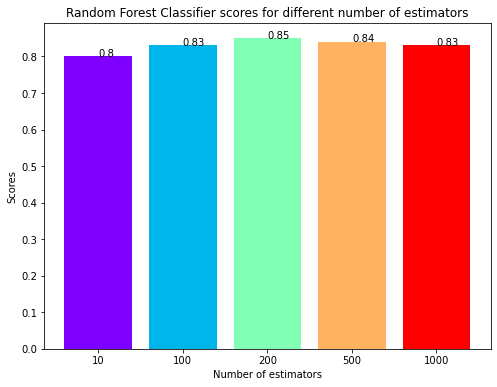

In [36]:
#plot these scores across a bar graph to see which gave the best results.
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

**Taking a look at the bar graph, we can see that the maximum score of 85% was achieved for both 200 trees.**

**Conclusion**
The project involved analysis of the heart disease patient dataset with proper data processing. Then, 4 models were trained and tested with maximum scores as follows:

K Neighbors Classifier: 74%

Support Vector Classifier: 81%

Decision Tree Classifier: 83%

Random Forest Classifier: 85%

**RandomForest  Classifier scored the best score of 85% with 200 trees.**